In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the data set and making PassengerId as index column
df = pd.read_csv(r'/Users/saras/Desktop/DSA 2022/datasets/titanic_dataset_week15.csv',index_col = 'PassengerId')

In [5]:
#Check the basic details of the dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<h2> EDA

In [8]:
#Survived

100 * (df['Survived']==0).sum() / len(df)

61.61616161616162

More than 60% of the passengers didnot survive in this tragedy. 

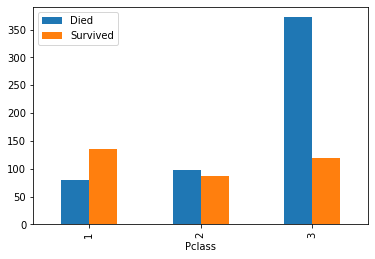

In [9]:
#Pclass - This feature renders the passenger division.
CrosstabResult=pd.crosstab(index=df['Pclass'],columns=df['Survived'])
CrosstabResult.plot.bar()
plt.legend(('Died', 'Survived'), loc='best')

Third Class had the highest number of passengers. They had the least number of survivers. 

64.75869809203142


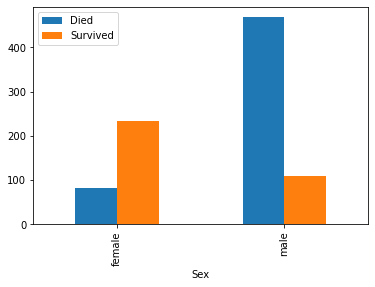

In [10]:
#Sex 
print(100 * (df['Sex']=='male').sum() / len(df))
CrosstabResult=pd.crosstab(index=df['Sex'],columns=df['Survived'])
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')

Approximately 65% of the passengers were male while the remaining 35% were female. Nonetheless, the percentage of female survivors was higher than the number of male survivors.

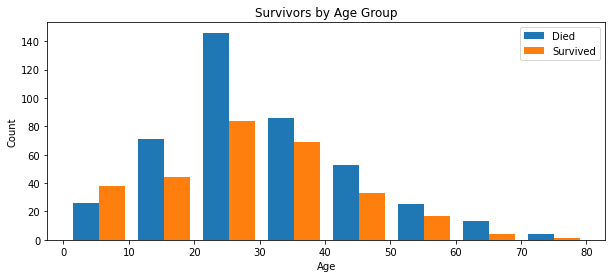

In [11]:
#Age
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']

plt.figure(figsize=(10,4))
plt.hist([df1,df2], bins=8)

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Clearly, a larger fraction of children under 10 survived than died. Every other age group, the number of casualties
was higher than the number of survivors.
More than 250 people within the age group 20 and 30 were dead as compared to just under 120 people of the same age 
range survived.

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Text(0, 0.5, 'Count')

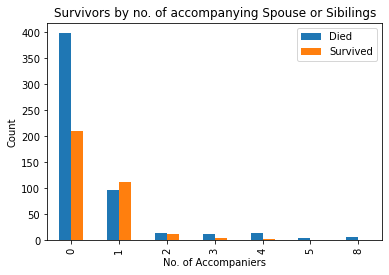

In [12]:
#SibSp - SibSp is the number of siblings or spouse of a person onboard.

CrosstabResult=pd.crosstab(index=df['SibSp'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by no. of accompanying Spouse or Sibilings')
plt.xlabel('No. of Accompaniers')
plt.ylabel('Count')

Most of the people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


Text(0, 0.5, 'Count')

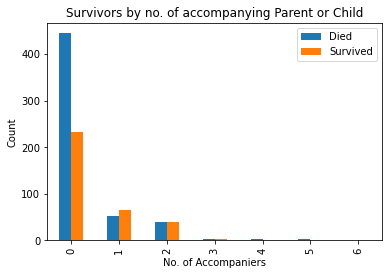

In [13]:
# Parch - This feature contained the number of parents or children each passenger was touring with.

CrosstabResult=pd.crosstab(index=df['Parch'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by no. of accompanying Parent or Child')
plt.xlabel('No. of Accompaniers')
plt.ylabel('Count')

Most of the people traveled alone.<br>
The chances of survival dropped drastically if someone traveled with parent or child.

Survived         0    1
Fare_Category          
Low            165   43
Mid            150   67
High_Mid       134  102
High            76  101


Text(0, 0.5, 'Count')

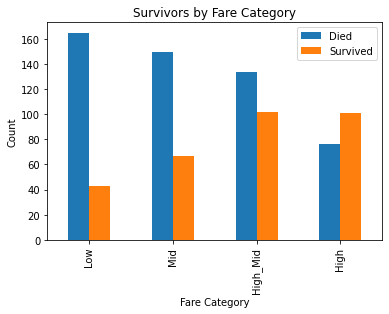

In [14]:
#Fare 

data1=df.copy()
data1['Fare_Category'] = pd.cut(data1['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

CrosstabResult=pd.crosstab(index=data1['Fare_Category'],columns=data1['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Count')

The higher a passenger paid, the higher would be his chances to survive.

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


Text(0, 0.5, 'Count')

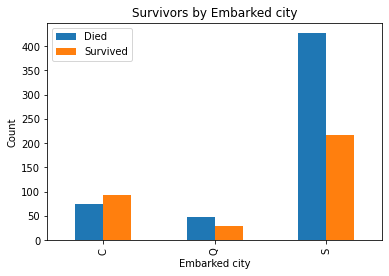

In [15]:
#Embarked
CrosstabResult=pd.crosstab(index=df['Embarked'],columns=df['Survived'])
print(CrosstabResult)
CrosstabResult.plot.bar()

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Embarked city')
plt.xlabel('Embarked city')
plt.ylabel('Count')

Most of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded 
from Queenstown. <br>
People who boarded from Cherbourg had a higher chance of survival than people who boarded from 
Southampton or Queenstown. <br>

In [17]:
#Checking for null values in dataset 
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms
missingdata(df)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Age,Cabin and Embarked columns have missing values. Cabin and Embarked are categorical variables.  

<AxesSubplot:ylabel='PassengerId'>

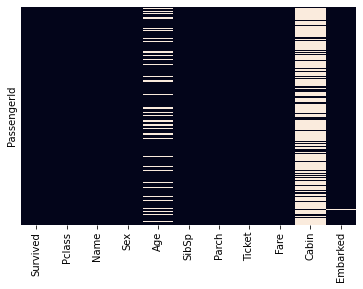

In [18]:
#visualizing missing values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
#Filling the missing values in Age column
df['Age'].mean()

29.69911764705882

In [20]:
df['Age'].median()

28.0

Mean is more than median, indicating right Skewed data. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

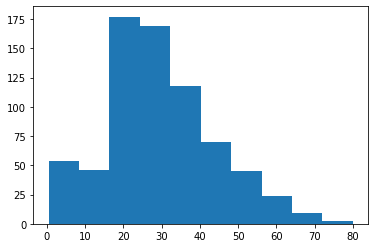

In [21]:
plt.hist(df['Age'])

Age column is right skewed, Therefore using median to fill the null values. 

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [23]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
#filling the missing values in Embarked column with mode. 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [25]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

We can fill the missing values with mode. However,since almost 77% of the data is missing,it doesn’t make sense
to impute with the most frequent class. Instead, choosing to drop the column

In [27]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Missing values present in all columns are filled in the dataset. 

<h2> Feature engineering

In [31]:
#Create new feature FamilySize as a combination of SibSp and Parch

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [34]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [36]:
# Create a new feature Title, containing the titles of passenger names
df['Title'] = df['Name'].apply(get_title)

In [37]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
# Group all non-common titles into one single grouping "Rare"
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [41]:
#create bin for age features
df['Age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [44]:
## create bin for fare features
df['Fare_bin'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,32,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [45]:
drop_column = ['Age','Fare','Name','Ticket']
df.drop(drop_column, axis=1, inplace = True)

In [46]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
PassengerId,,,,,,,,,,
1,0,3,male,1,0,S,2,Mr,Adult,Low_fare
2,1,1,female,1,0,C,2,Mrs,Adult,high_fare
3,1,3,female,0,0,S,1,Miss,Adult,median_fare
4,1,1,female,1,0,S,2,Mrs,Adult,high_fare
5,0,3,male,0,0,S,1,Mr,Adult,median_fare


<h2>Encoding

In [48]:
df_en = pd.get_dummies(df, columns = ['Sex','Title','Age_bin','Embarked','Fare_bin'],
                             prefix=['Sex','Title','Age_type','Em_type','Fare_type'])

In [51]:
df_en.shape

(891, 23)

<h2>Correlation study

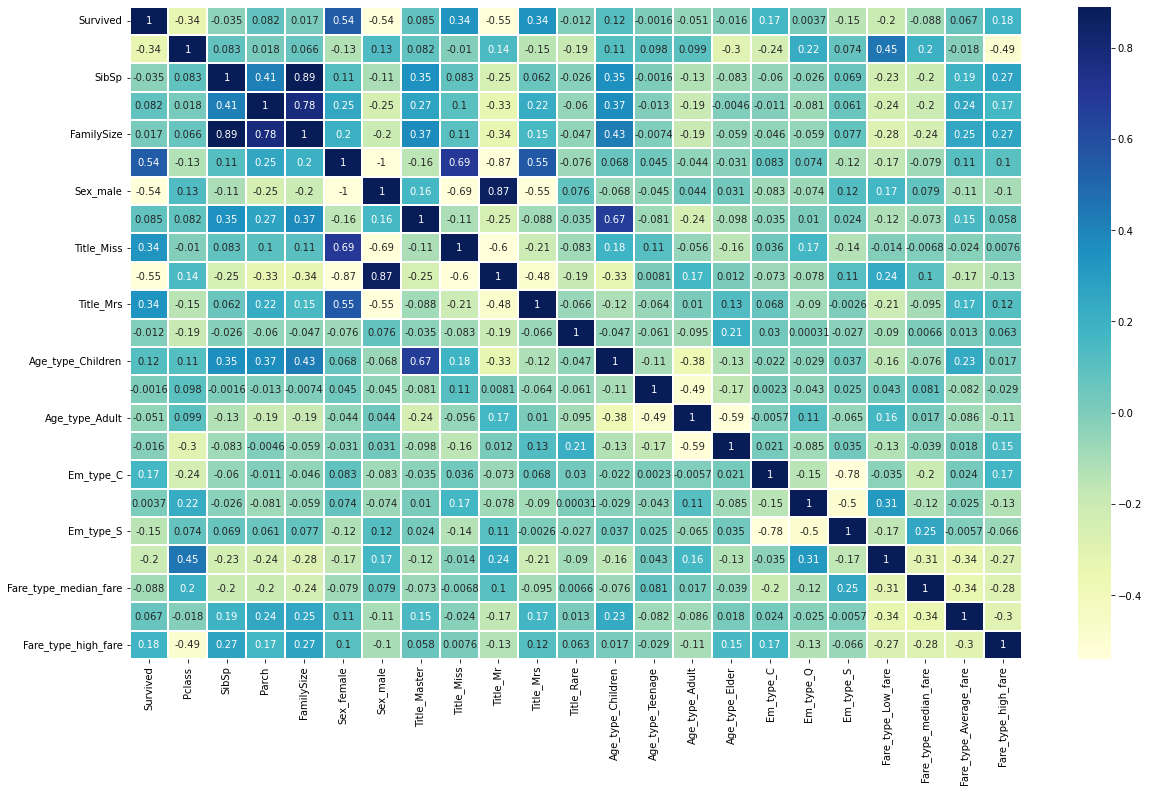

In [62]:
#Naive Bayes models expect the features to be independent, so let's apply the Pearson 
#correlation coefficient on them to give us a hint about how independent they are from the others.
sns.heatmap(df_en.corr(),vmin = -0.54, vmax= 0.89,annot = True,linewidth =0.2,cmap = 'YlGnBu')
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Features not high enough to drop at this point.

In [63]:
#Target and independent variables. 
X = df_en.drop('Survived', axis=1)
y = df_en['Survived']

In [64]:
X.describe()

,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,1.904602,0.352413,0.647587,0.044893,0.207632,0.580247,0.141414,...,0.123457,0.630752,0.168350,0.188552,0.086420,0.725028,0.233446,0.243547,0.269360,0.194164
std,0.836071,1.102743,0.806057,1.613459,0.477990,0.477990,0.207186,0.405840,0.493796,0.348644,...,0.329146,0.482872,0.374387,0.391372,0.281141,0.446751,0.423261,0.429463,0.443877,0.395778
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>Feature Scaling 

In [73]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

<h2>Model Building

In [94]:
#Checking the imbalance of the dataset
y.value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


We can see that the Titanic data has a roughly 60:40 split, so we can fairly safely treat that dataset as being balanced,
and get away with using the accuracy score as a metric.

In [100]:
#Splitting the dataset into train and validation test
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)

In [75]:
X_train.shape

(623, 22)

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred6=GNB_model.predict(X_test)

In [77]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred6,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.821656,0.826923,0.824281,156.000000
1,0.756757,0.750000,0.753363,112.000000
accuracy,0.794776,0.794776,0.794776,0.794776
macro avg,0.789206,0.788462,0.788822,268.000000
weighted avg,0.794534,0.794776,0.794644,268.000000


In [101]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
f1_score(y_pred6,y_test)

0.7533632286995515

In [108]:

print('Accuracy score: ',accuracy_score (y_pred6,y_test))

Accuracy score:  0.7947761194029851


<h3>Hyperparameter tuning of GNB to improve accuracy 

In [96]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [98]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [102]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GNB_model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [103]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [104]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [105]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8059701492537313


<h6>BernoulliNB

In [79]:
from sklearn.naive_bayes import BernoulliNB
BNB_model = BernoulliNB()
BNB_model = BNB_model.fit(X_train , y_train)
y_pred7=BNB_model.predict(X_test)

In [80]:
print("Results from Bernoulli Naive bayer are as below")
BNB_result = classification_report(y_pred7,y_test,output_dict=True)
BNB_result = pd.DataFrame(BNB_result).transpose()
BNB_result

Results from Bernoulli Naive bayer are as below


,precision,recall,f1-score,support
0,0.834395,0.834395,0.834395,157.00000
1,0.765766,0.765766,0.765766,111.00000
accuracy,0.805970,0.805970,0.805970,0.80597
macro avg,0.800080,0.800080,0.800080,268.00000
weighted avg,0.805970,0.805970,0.805970,268.00000


In [81]:
from sklearn.metrics import f1_score,accuracy_score 
f1_score(y_pred7,y_test)

0.7657657657657657

In [109]:
accuracy_score (y_pred7,y_test)

0.8059701492537313